In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
df_X = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


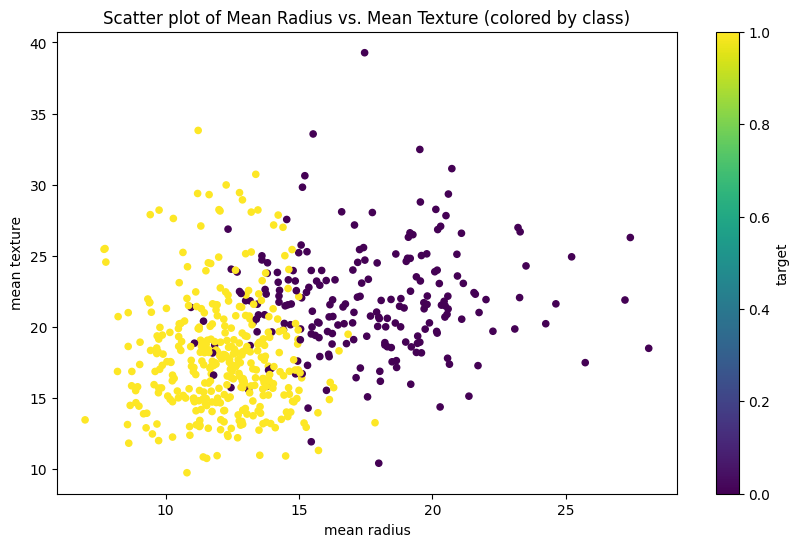

In [ ]:
df.plot.scatter(
    x='mean radius',
    y='mean texture',
    c='target',  # Color by the target column
    cmap='viridis',  # Use a colormap
    figsize=(10, 6)
)
plt.title('Scatter plot of Mean Radius vs. Mean Texture (colored by class)')
plt.show()

Standard Scaler is used to normalize the data, i.e., make it normal distributon.

In [ ]:
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
def sigmoid(z) :
  return 1 / (1 + np.exp(-z))

In [ ]:
m, n = X_train.shape
theta = np.zeros(X_train.shape[1])
alpha = 0.01
n_iterations = 10000

for i in range(n_iterations) :
  W = X_train.dot(theta)
  h_theta = sigmoid(W)
  gradient = (1/m) * X_train.T.dot(y_train - h_theta)
  theta += alpha * gradient

print("Final theta (coefficients):", theta)

Final theta (coefficients): [ 0.03783382 -0.56186602 -0.70327331 -0.70727239 -0.1916353  -0.00464358
 -0.64201793 -0.76381675  0.01481981  0.41988086 -0.74746999  0.07939669
 -0.54090389 -0.63732476 -0.1462938   0.54616396  0.02984711 -0.21448747
  0.15264984  0.51934526 -1.02046404 -0.87557524 -0.93585359 -0.93874017
 -0.65931557 -0.16467339 -0.67689562 -0.88416829 -0.66039743 -0.16978372]


In [ ]:
# Make predictions on the test set
z = X_test.dot(theta)
y_pred_proba = 1 / (1 + np.exp(-z))

y_pred_class = (y_pred_proba >= 0.3).astype(int)

# Print the predicted vs. expected values for the first 10 examples
print("Predicted Probabilities vs. Expected (First 10 examples):")
for i in range(10):
    print(f"Predicted Probability: {y_pred_proba[i]:.2f}, Predicted Class: {y_pred_class[i]}, Expected: {y_test[i]}")

Predicted Probabilities vs. Expected (First 10 examples):
Predicted Probability: 0.84, Predicted Class: 1, Expected: 1
Predicted Probability: 0.02, Predicted Class: 0, Expected: 0
Predicted Probability: 0.99, Predicted Class: 1, Expected: 1
Predicted Probability: 0.01, Predicted Class: 0, Expected: 0
Predicted Probability: 0.14, Predicted Class: 0, Expected: 0
Predicted Probability: 0.01, Predicted Class: 0, Expected: 0
Predicted Probability: 0.00, Predicted Class: 0, Expected: 0
Predicted Probability: 0.19, Predicted Class: 0, Expected: 0
Predicted Probability: 1.00, Predicted Class: 1, Expected: 1
Predicted Probability: 0.97, Predicted Class: 1, Expected: 1


In [ ]:
mae = mean_absolute_error(y_test, y_pred_proba)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.0427


In [ ]:
m, n = X_train.shape
theta = np.zeros(n)
n_iterations = 10  # Note: A much smaller number of iterations is needed

# Newton's Method Training Loop
for i in range(n_iterations):
    # Calculate predicted probabilities
    z = X_train.dot(theta)
    h_theta = sigmoid(z)

    # Calculate the gradient
    gradient = (1/m) * X_train.T.dot(h_theta - y_train)

    # Create the diagonal matrix D
    D = np.diag(h_theta * (1 - h_theta))

    # Calculate the Hessian matrix
    H = (1/m) * X_train.T.dot(D).dot(X_train)

    # Update rule
    theta -= np.linalg.inv(H).dot(gradient)

print("Final theta (coefficients):", theta)

Final theta (coefficients): [  -1.23674342   -2.17642284  138.01681209  -97.60677666   -6.55206792
    9.05111449  -15.27738672  -14.88586448    6.28587266   -1.90395734
  -64.01804812    3.02643466   55.62250377   -1.46796096    4.70496721
   -2.37288928   19.69080769  -26.99782937    2.18078618   11.00313965
   73.3562573    -9.43088305 -121.95972435  -41.89091748   -0.3057918
   12.03404023  -18.39175564    7.72973525  -10.22641009  -11.85638772]


In [ ]:
# Make predictions on the test set
z_test = X_test.dot(theta)
y_pred_proba = sigmoid(z_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_proba)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.0349


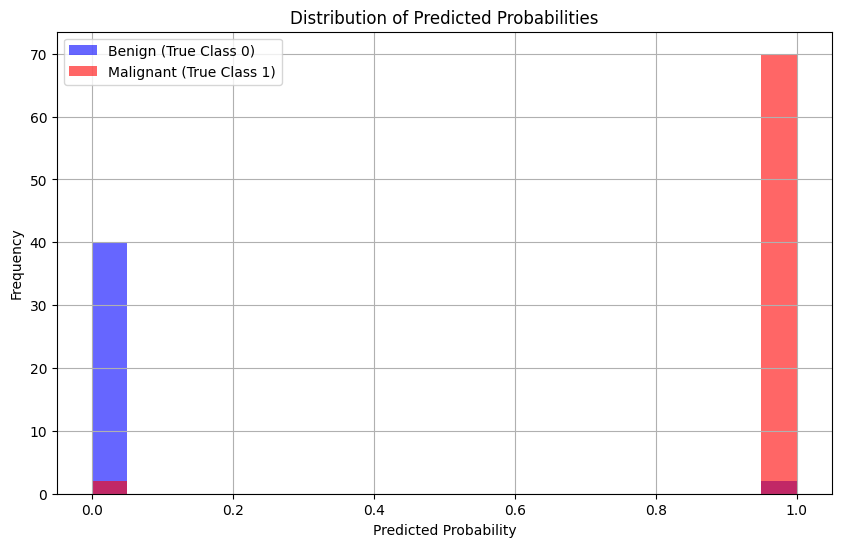

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba[y_test == 0], bins=20, alpha=0.6, label='Benign (True Class 0)', color='blue')
plt.hist(y_pred_proba[y_test == 1], bins=20, alpha=0.6, label='Malignant (True Class 1)', color='red')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()